In [1]:
%load_ext autoreload
%autoreload 2
import os
import pickle as pkl
from typing import Dict, Any

import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.dpi'] = 250

# change working directory to project root
if os.getcwd().split('/')[-1] == 'notebooks':
    os.chdir('../..')
from experiments.notebooks import viz

def get_comparison_result(path: str, estimator_name: str, test=False) -> Dict[str, Any]:
    if test:
        result_file = path + 'test/' + f'{estimator_name}_test_comparisons.pkl'
    else:
        result_file = path + 'val/' + f'{estimator_name}_comparisons.pkl'
    return pkl.load(open(result_file, 'rb'))    
    
MODEL_COMPARISON_PATH = 'experiments/comparison_data/'

datasets = [
        ("breast-cancer", 13),
        ("breast-w", 15),
        ("credit-g", 31),
        ("haberman", 43),
        ("heart", 1574),
        ("labor", 4),
        ("vote", 56),
    ]

# dataset stats

In [2]:
metadata = []
columns = ['name', 'samples', 'features', 'class 0 ct', 'class 1 ct', 'majority class %']
for dataset_name, data_id in datasets:
    dataset = fetch_openml(data_id=data_id, as_frame=False)
    shape = dataset.data.shape
    class_counts = np.unique(dataset.target, return_counts=True)[1]
    metadata.append([dataset_name, shape[0], shape[1], class_counts[0], class_counts[1], np.max(class_counts) / np.sum(class_counts)])
pd.DataFrame(metadata, columns=columns).set_index('name') 

,samples,features,class 0 ct,class 1 ct,majority class %
name,,,,,
breast-cancer,286,9,201,85,0.702797
breast-w,699,9,458,241,0.655222
credit-g,1000,20,300,700,0.700000
haberman,306,3,225,81,0.735294
heart,270,13,150,120,0.555556
labor,57,16,20,37,0.649123
vote,435,16,267,168,0.613793


# complexity vs. ROC Area plot for all models

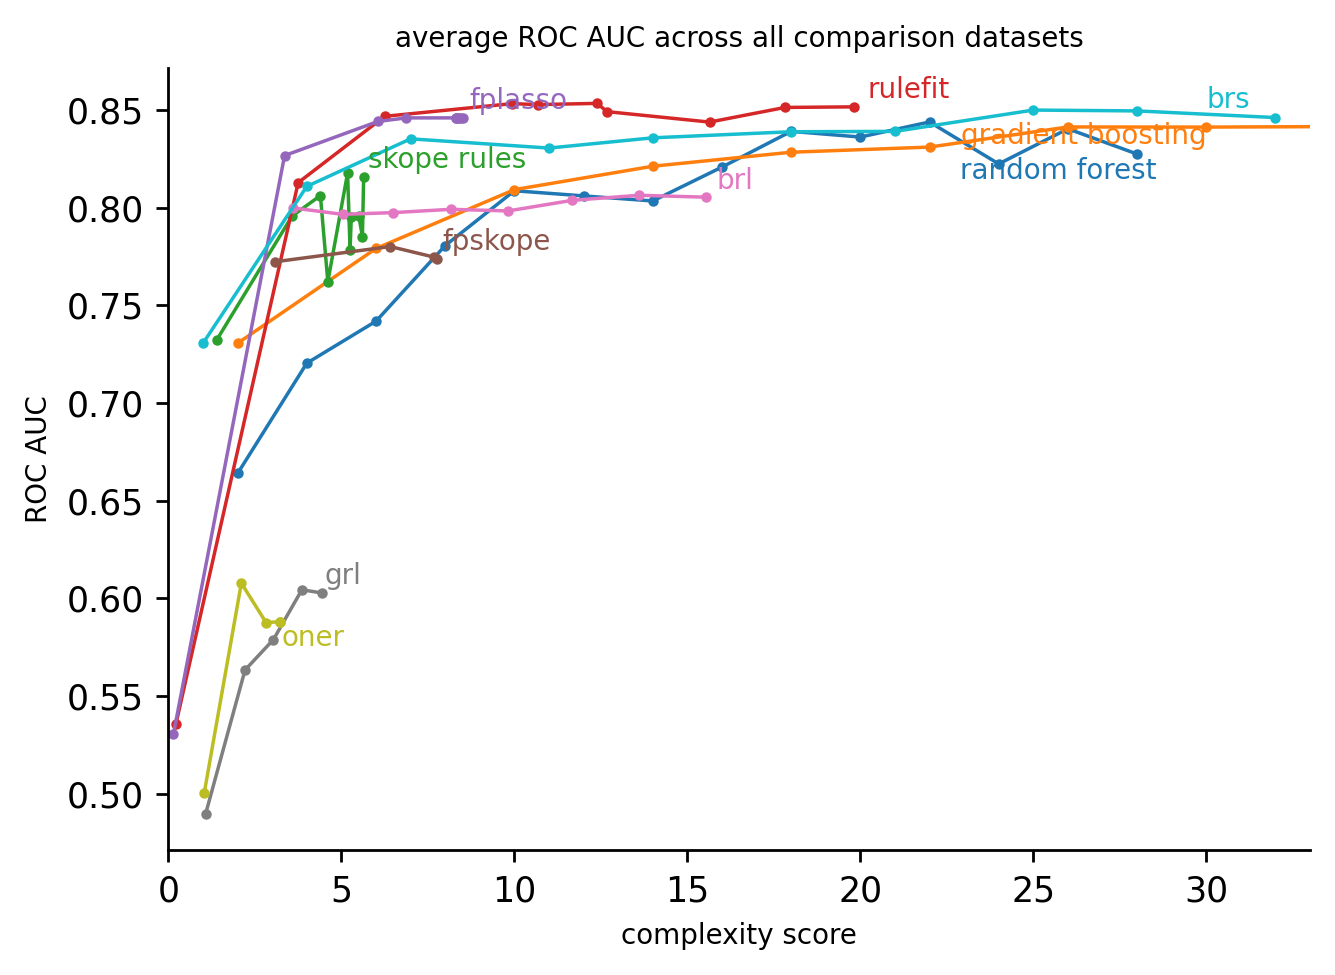

In [3]:
test_models = [
    'random_forest', 
    'gradient_boosting', 
    'skope_rules', 
    'rulefit', 
    'fplasso', 
    'fpskope',
    'brl',
    'grl',
    'oner',
    'brs']
test_results = [get_comparison_result(MODEL_COMPARISON_PATH, mname, test=True)
                for mname in test_models]
viz.viz_comparison_test_average(test_results)
plt.show()

**check individual datasets**

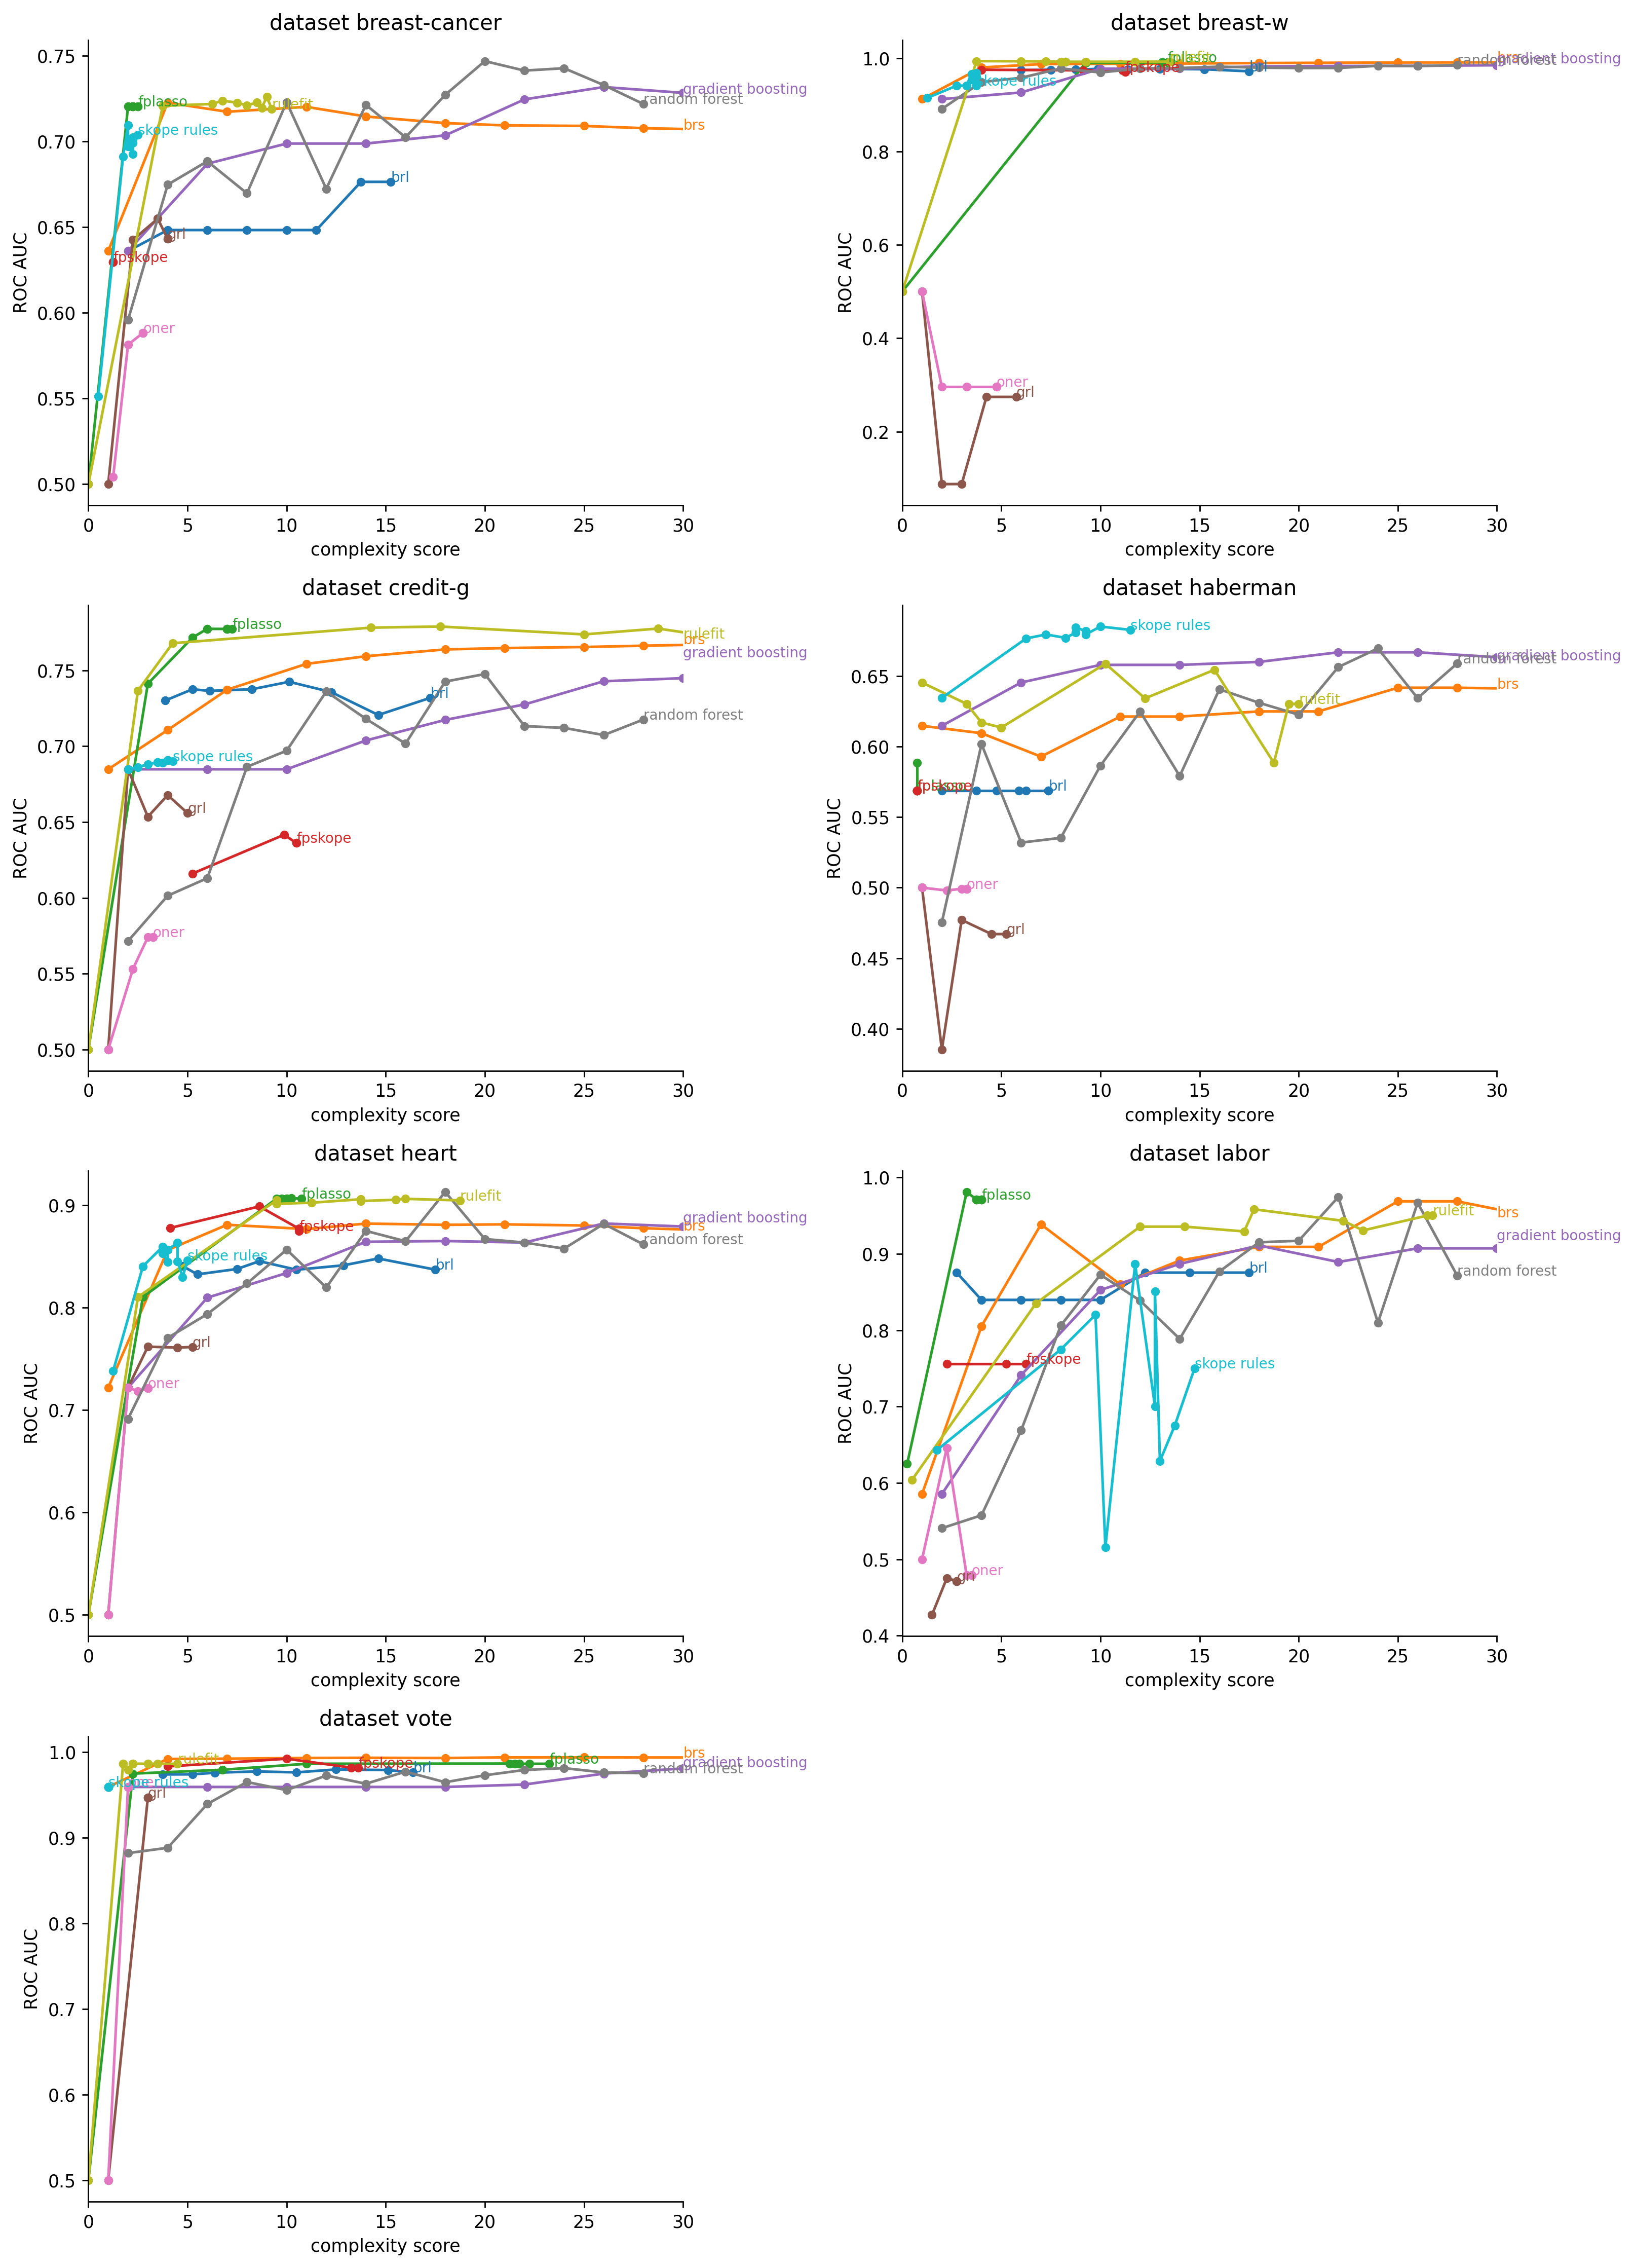

In [4]:
viz.viz_comparison_datasets(test_results, cols=2, figsize=(13, 18), test=True)
plt.show()

# check each model

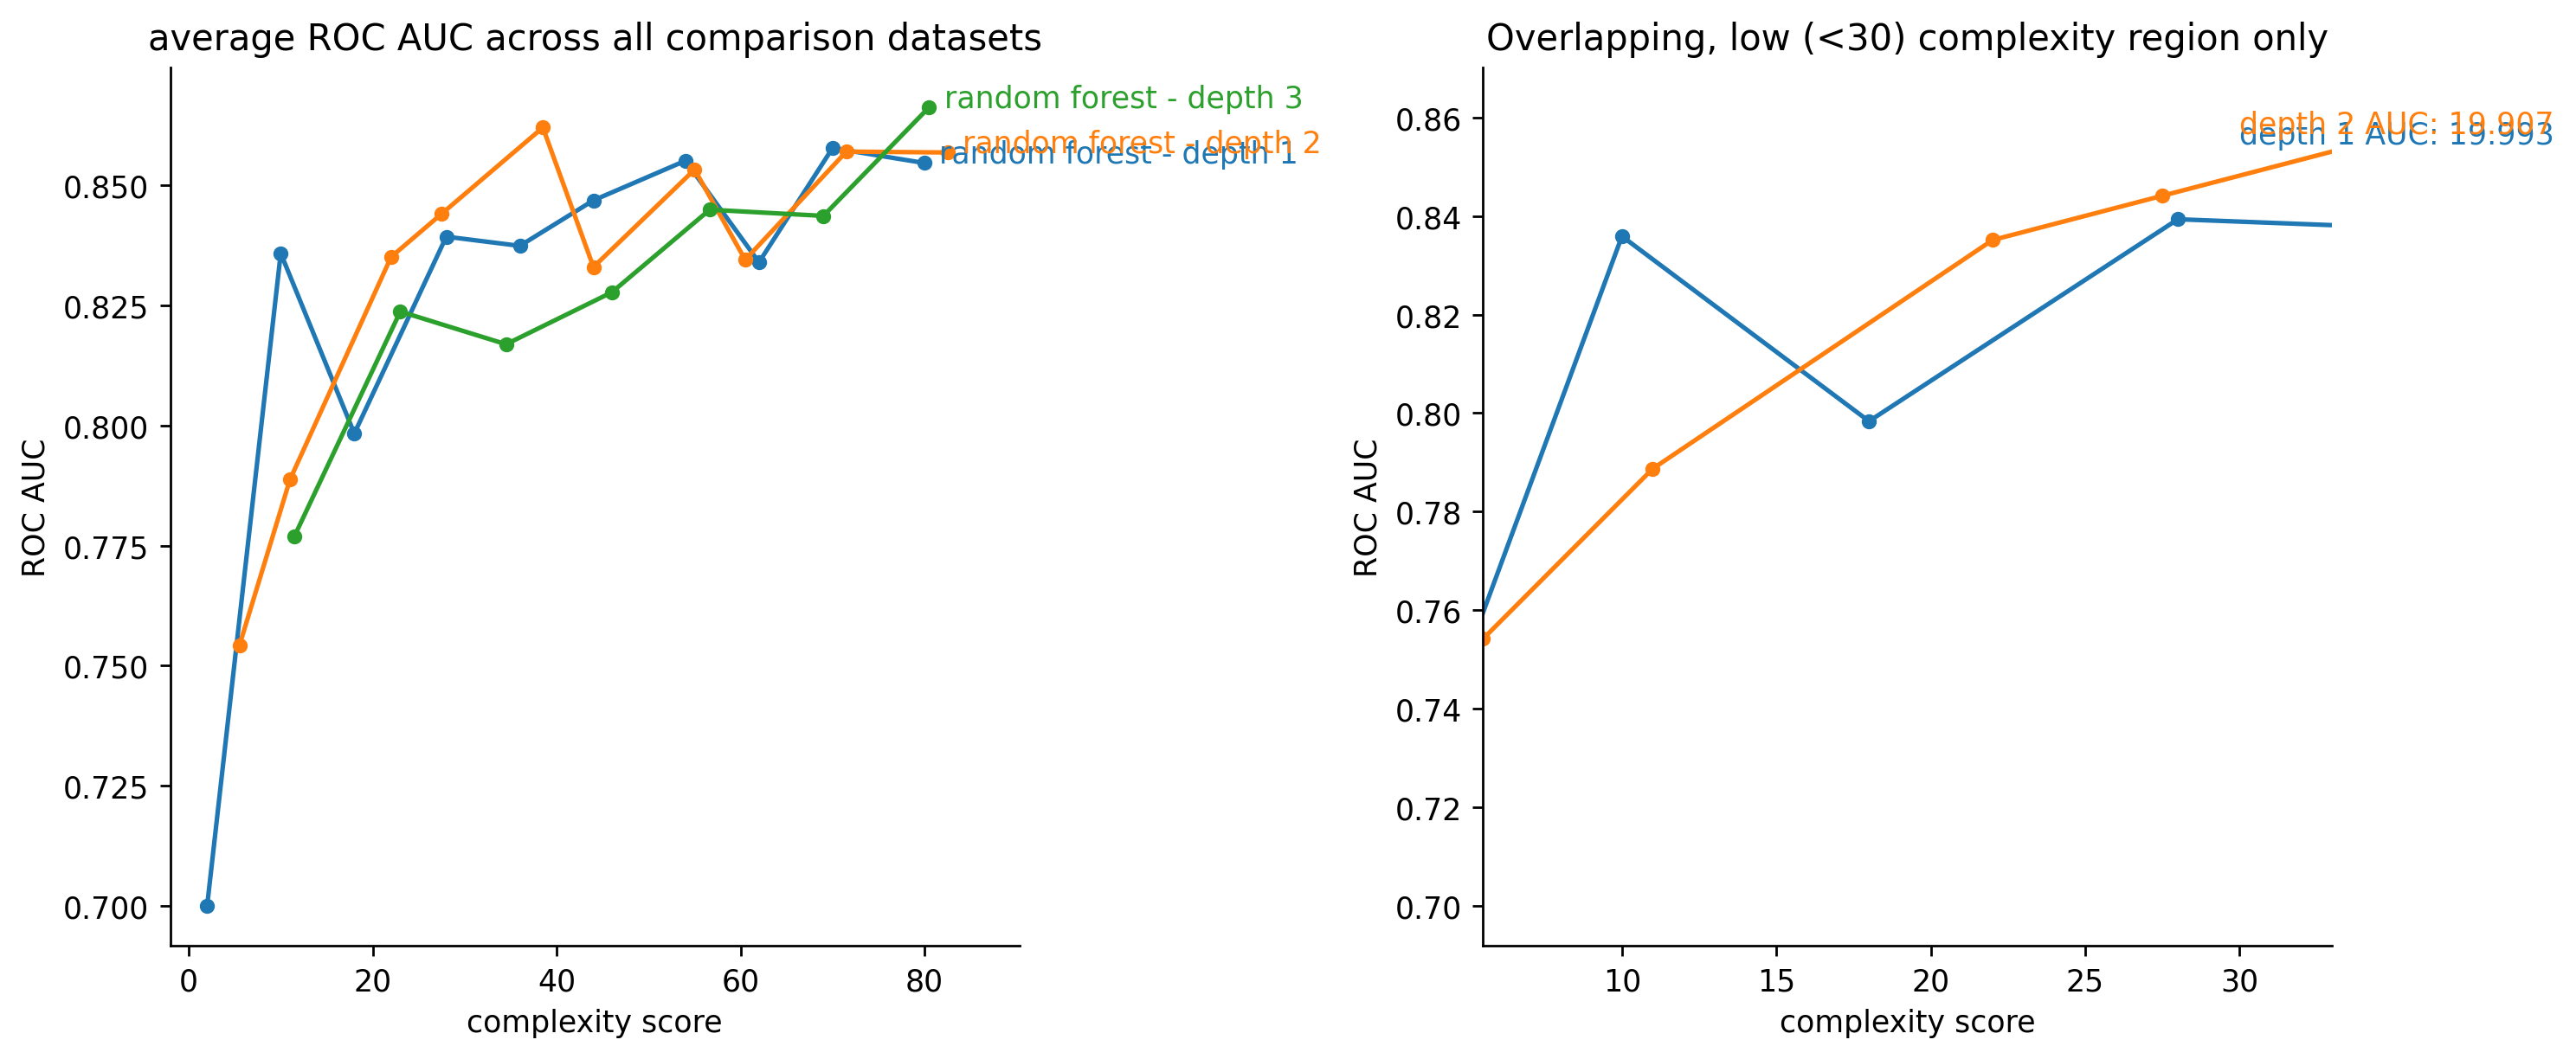

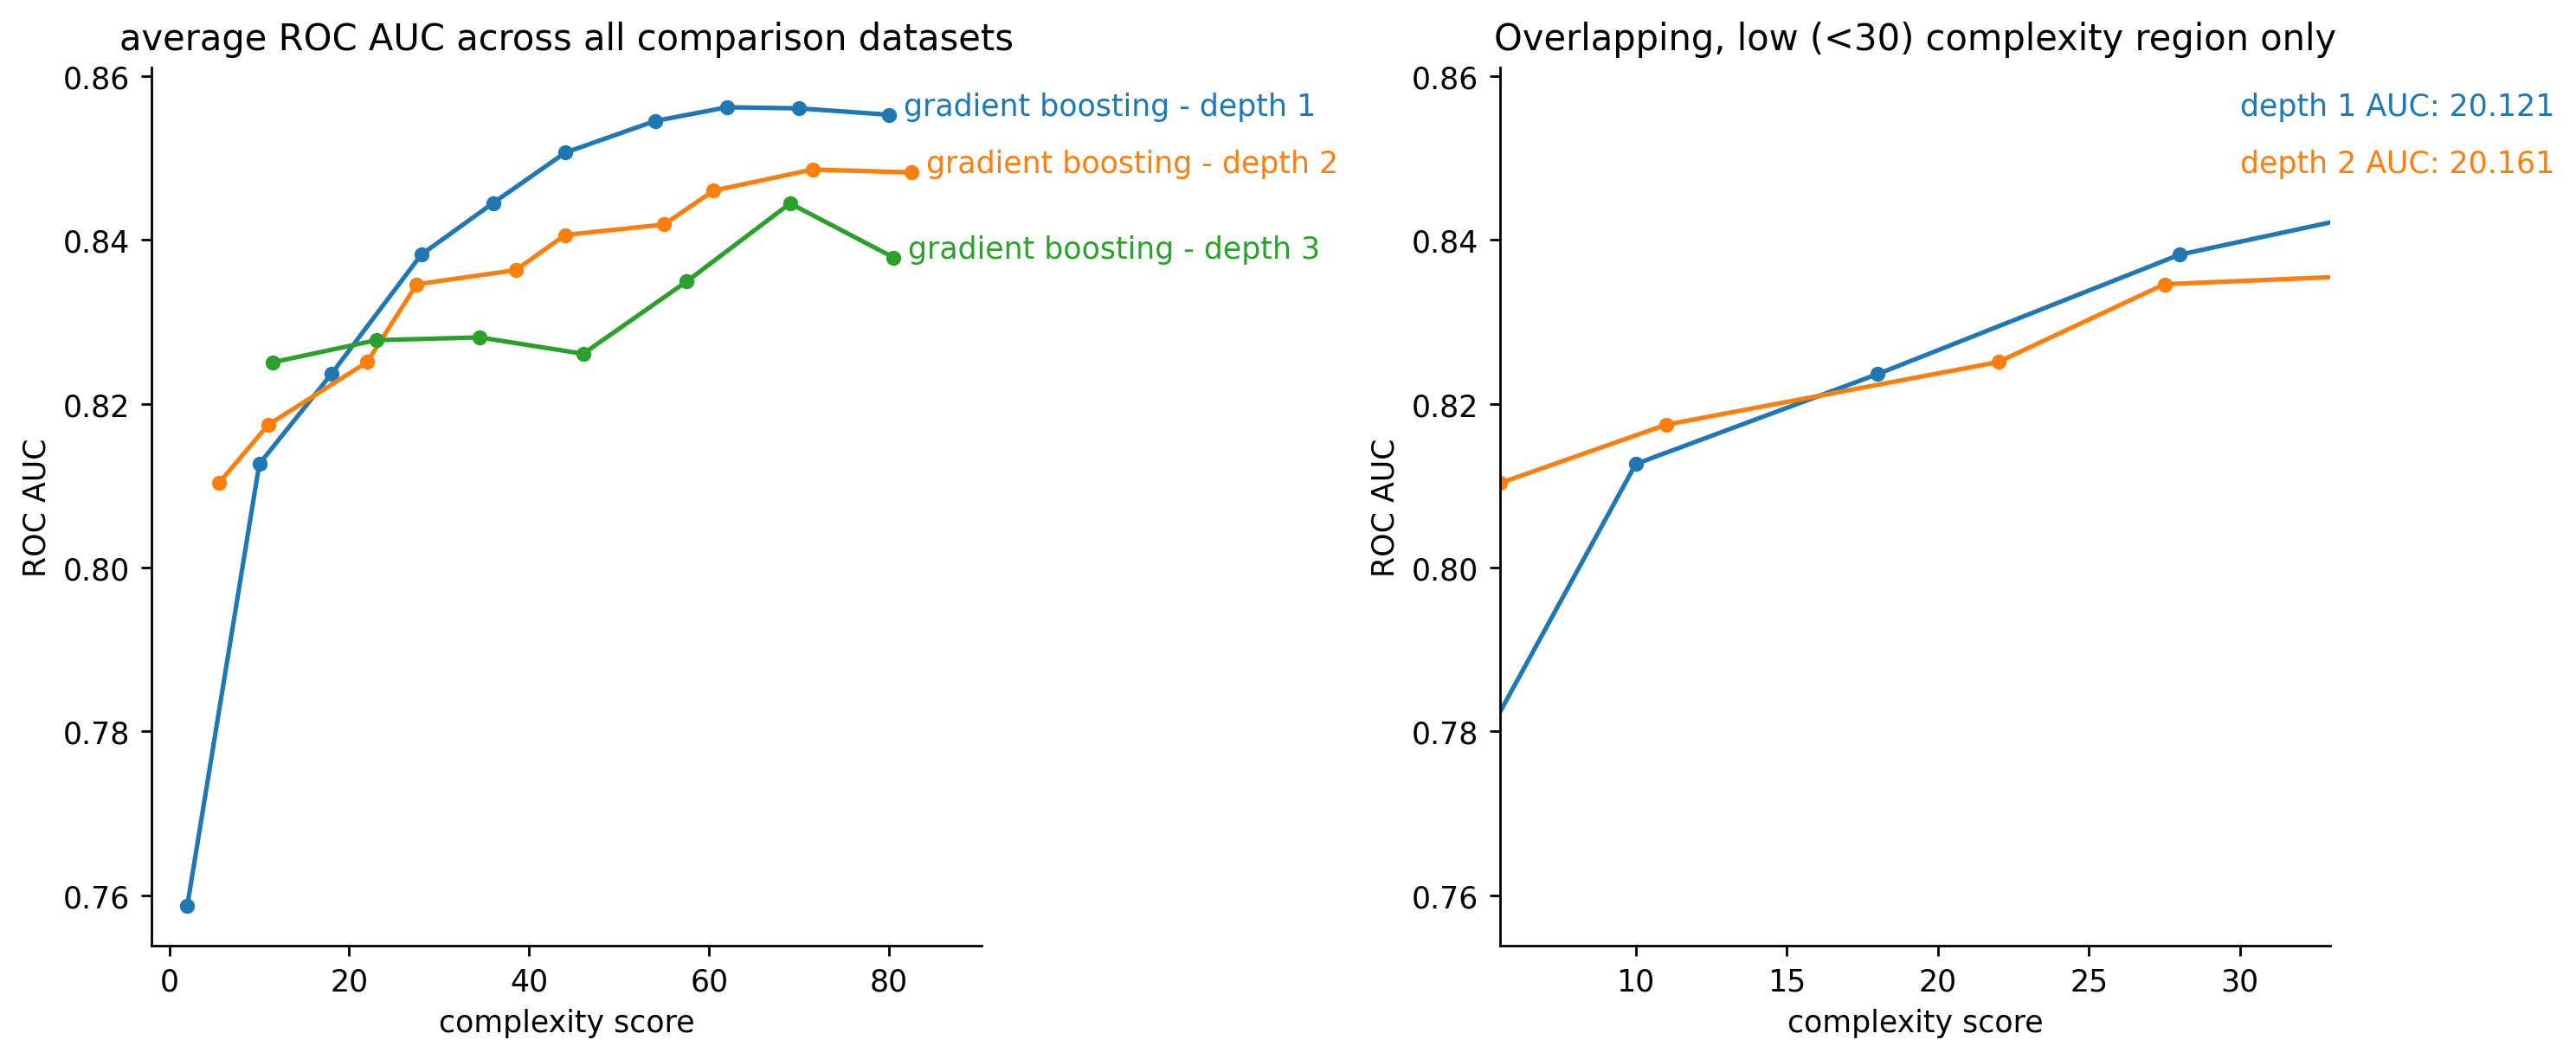

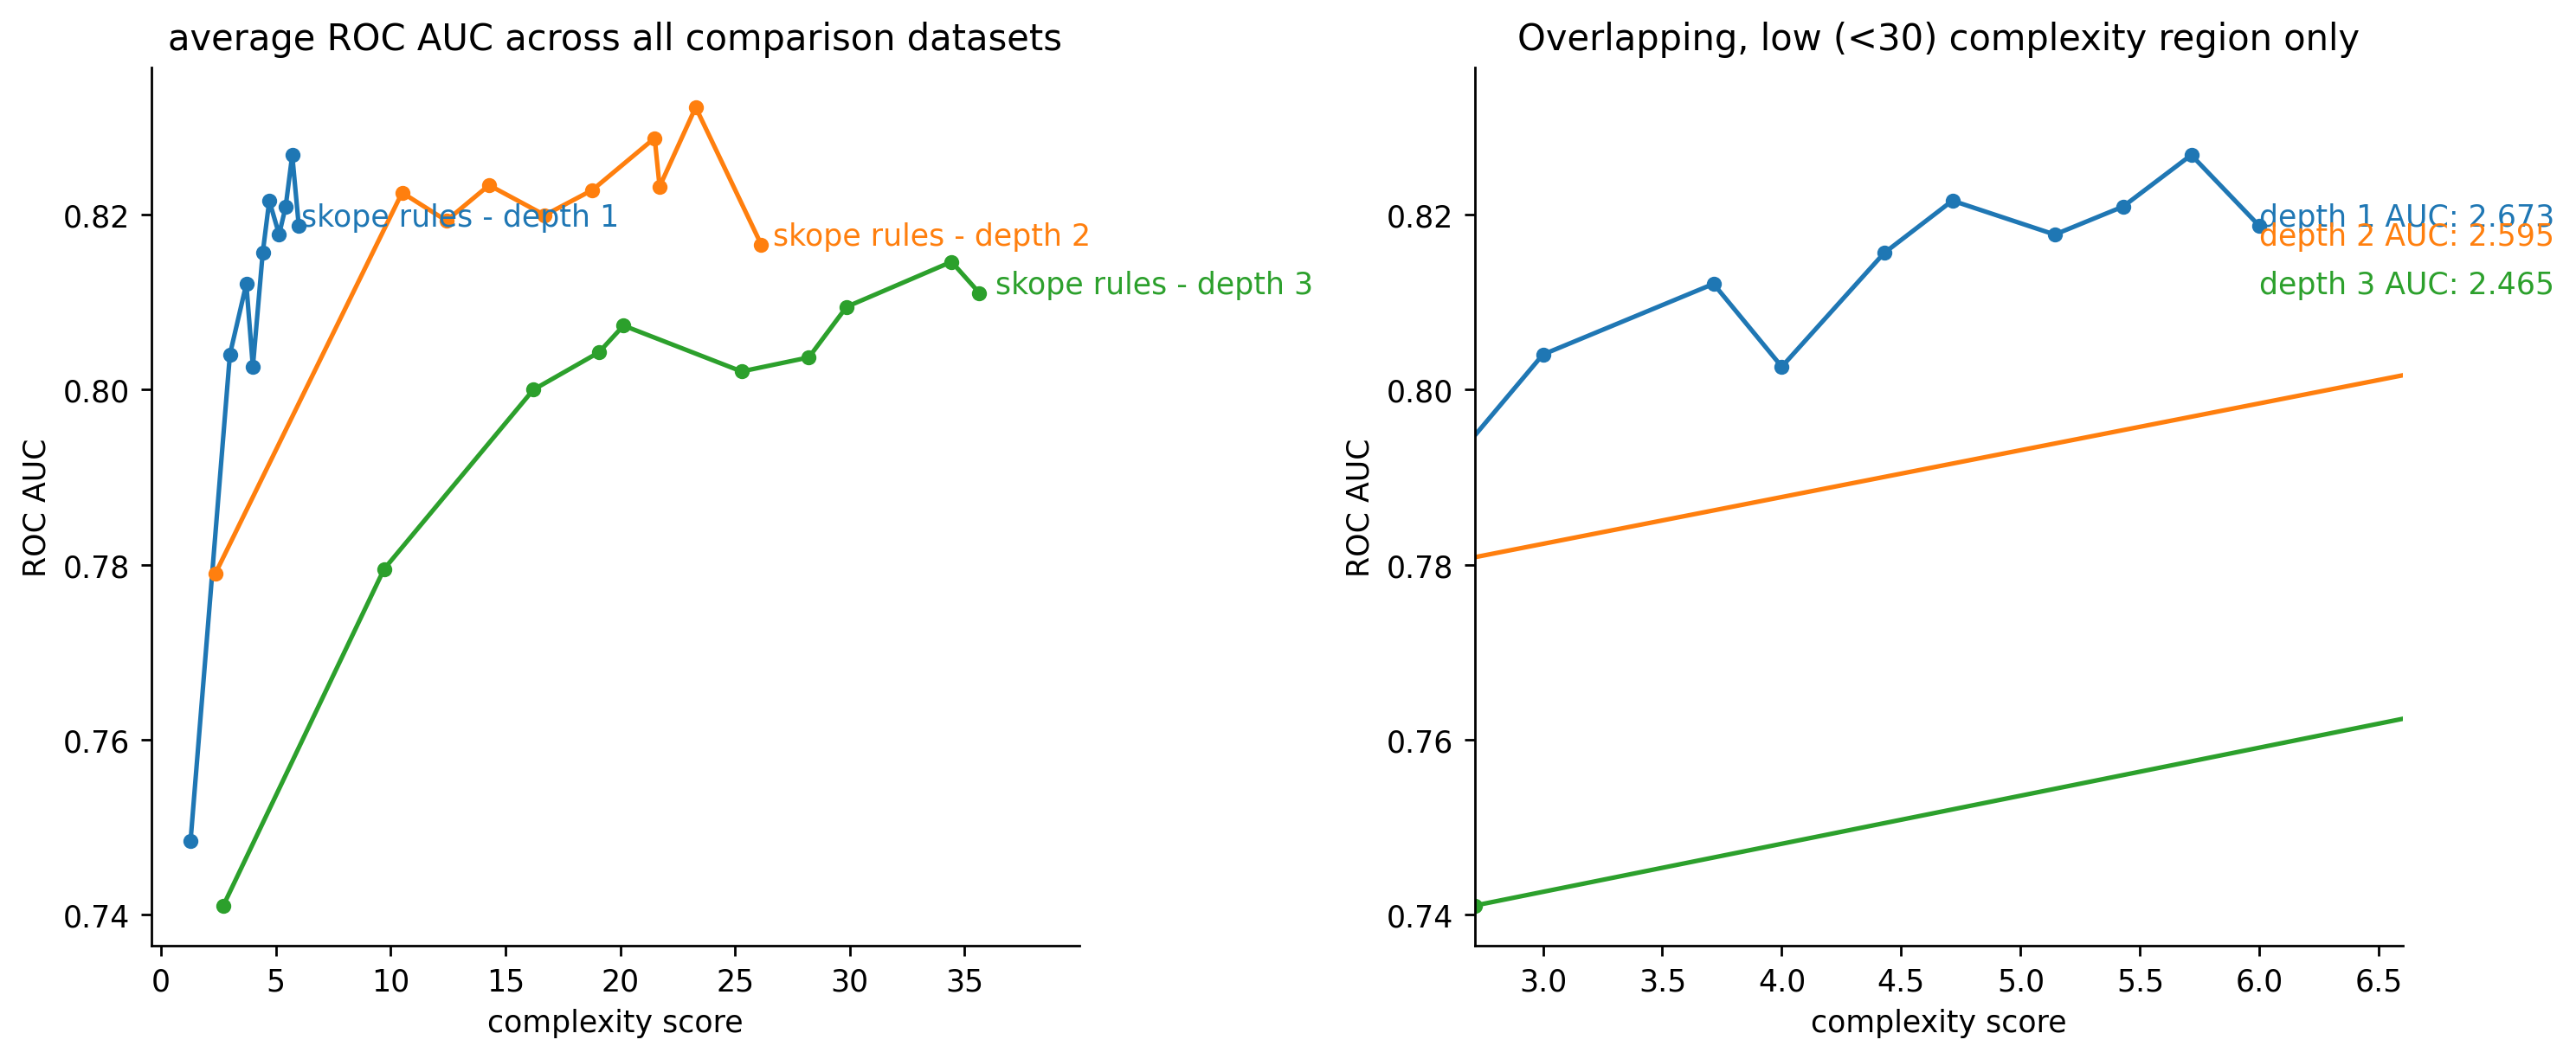

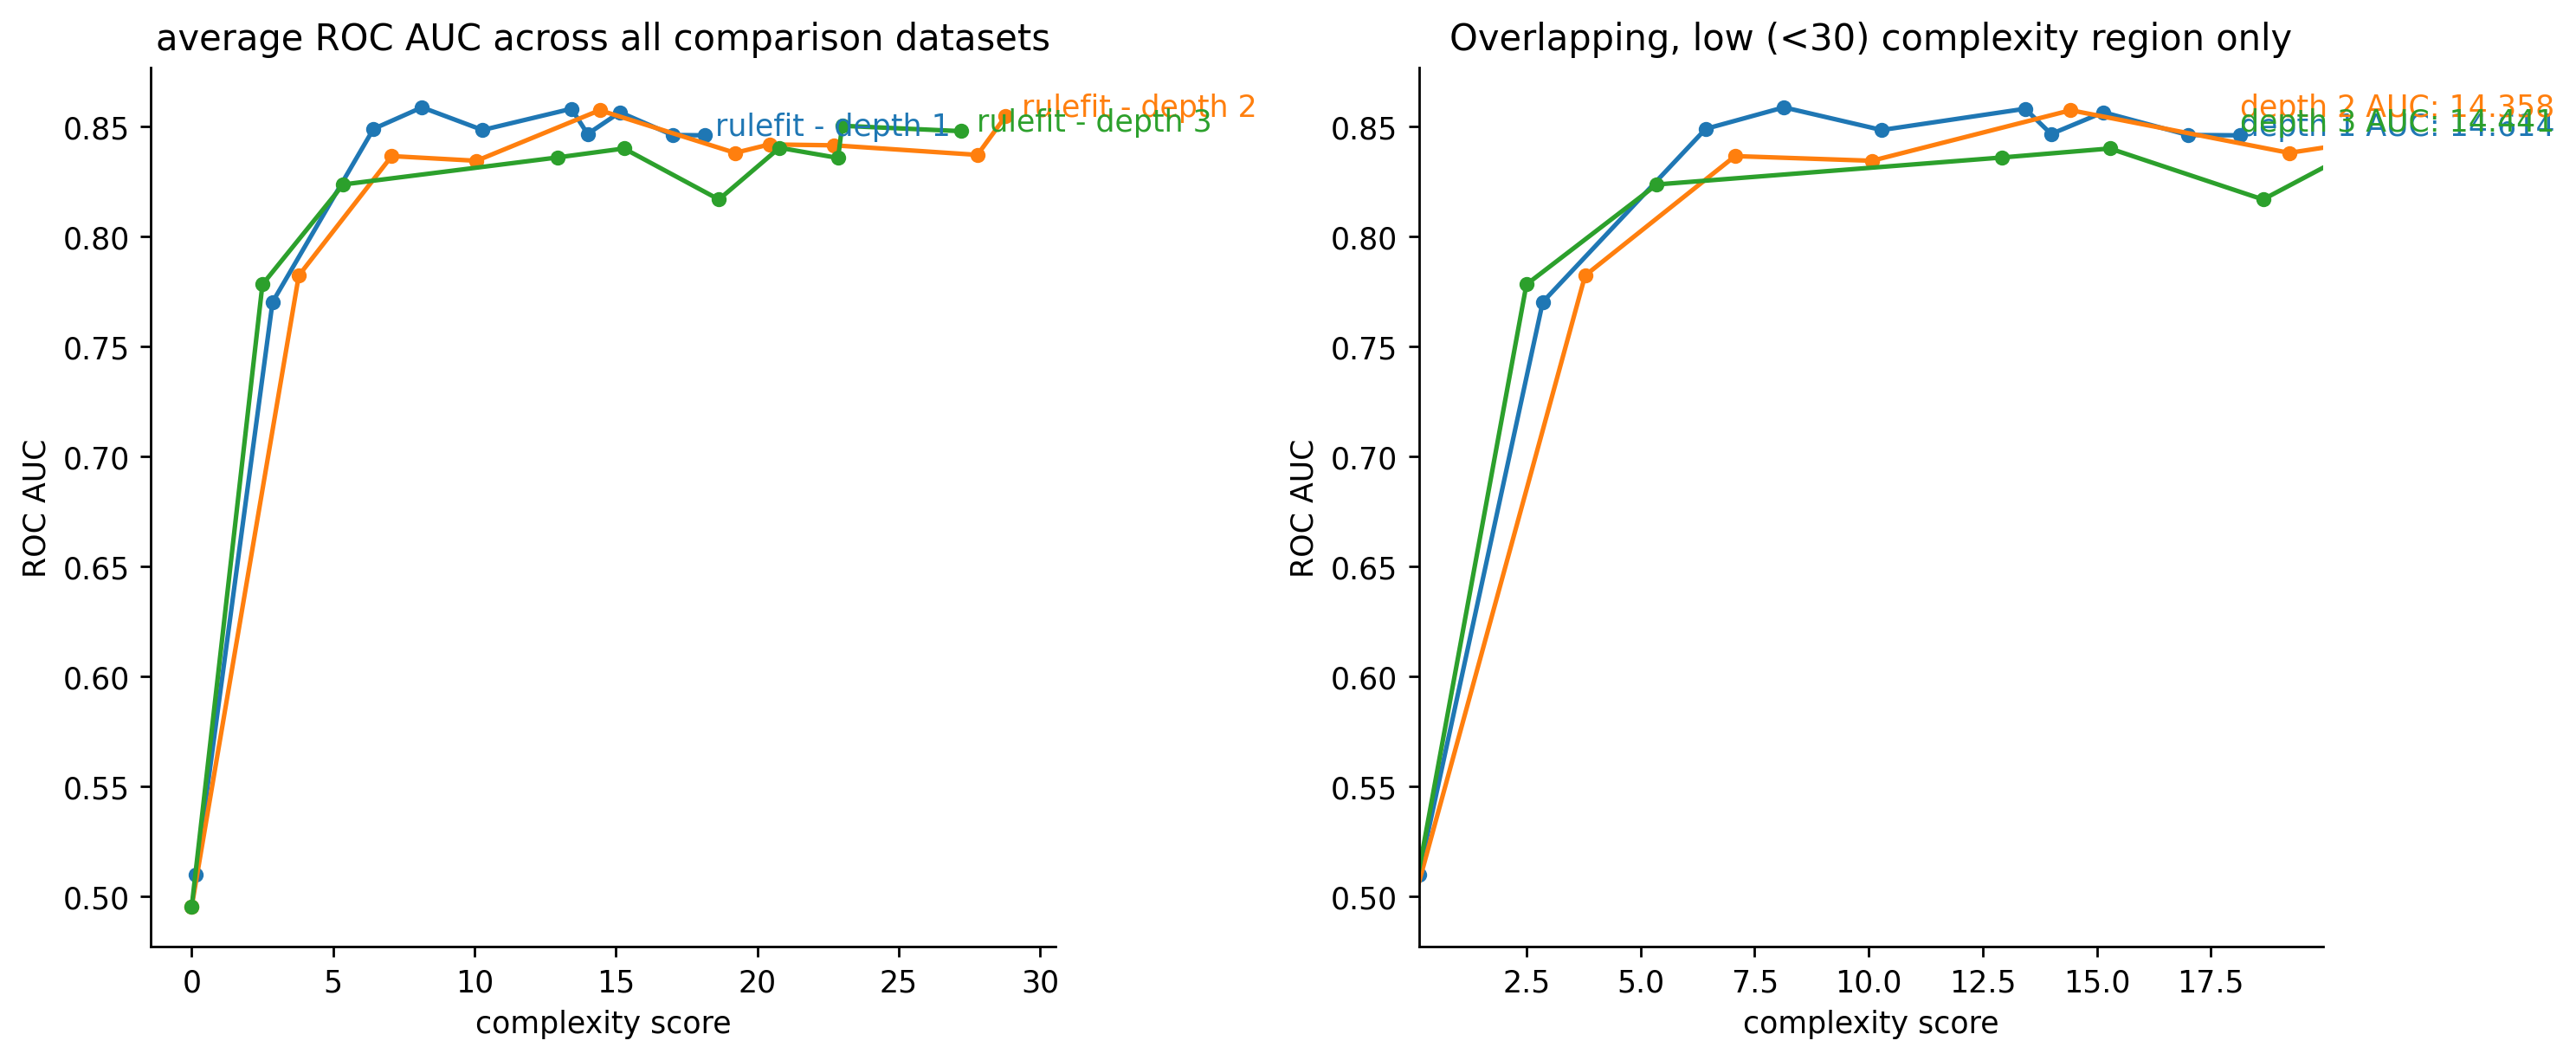

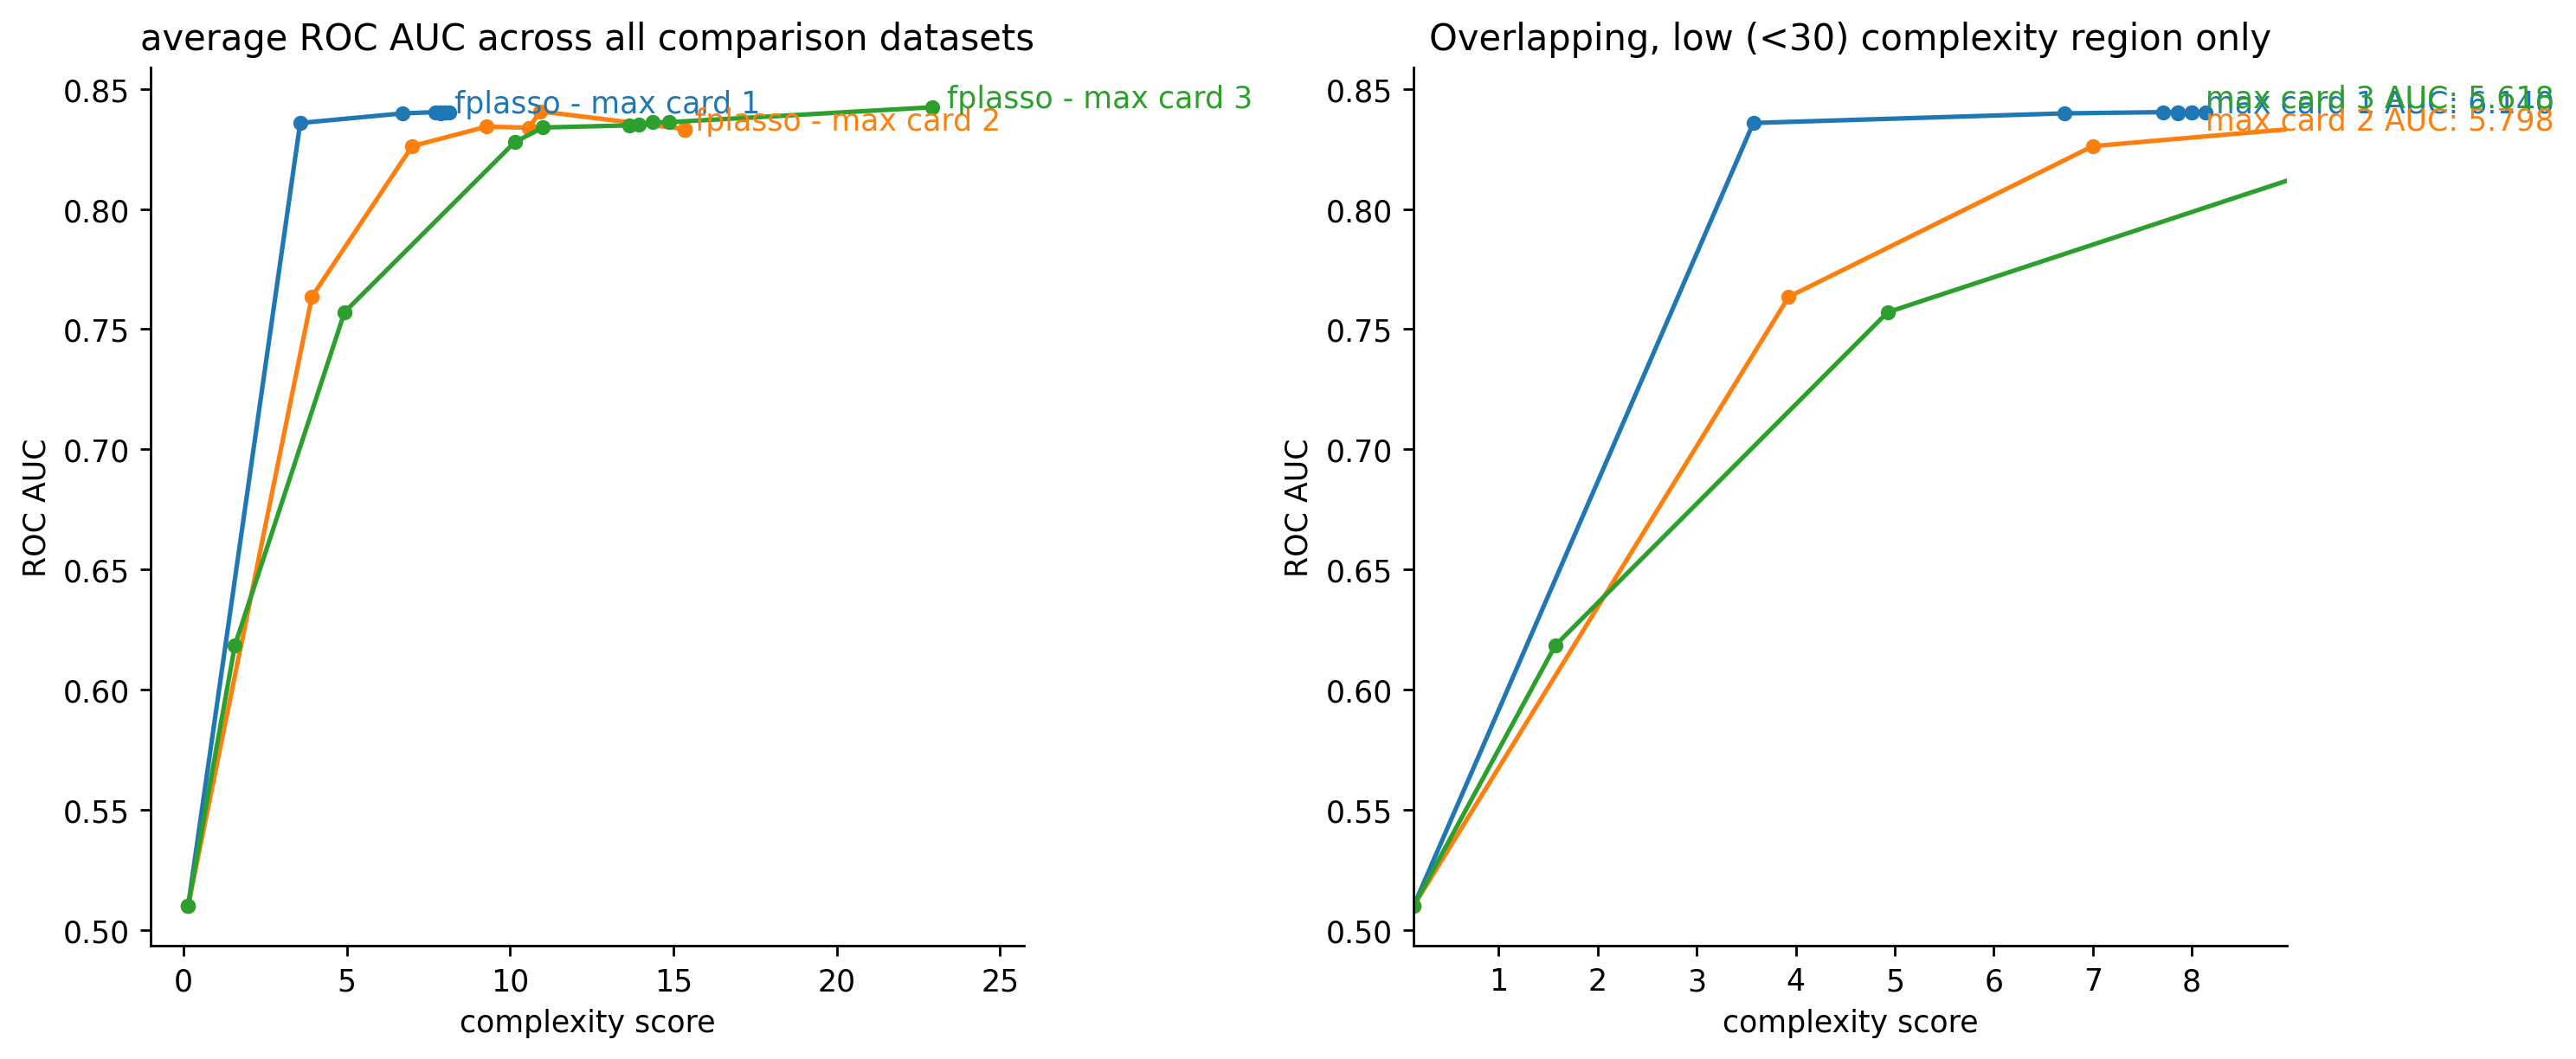

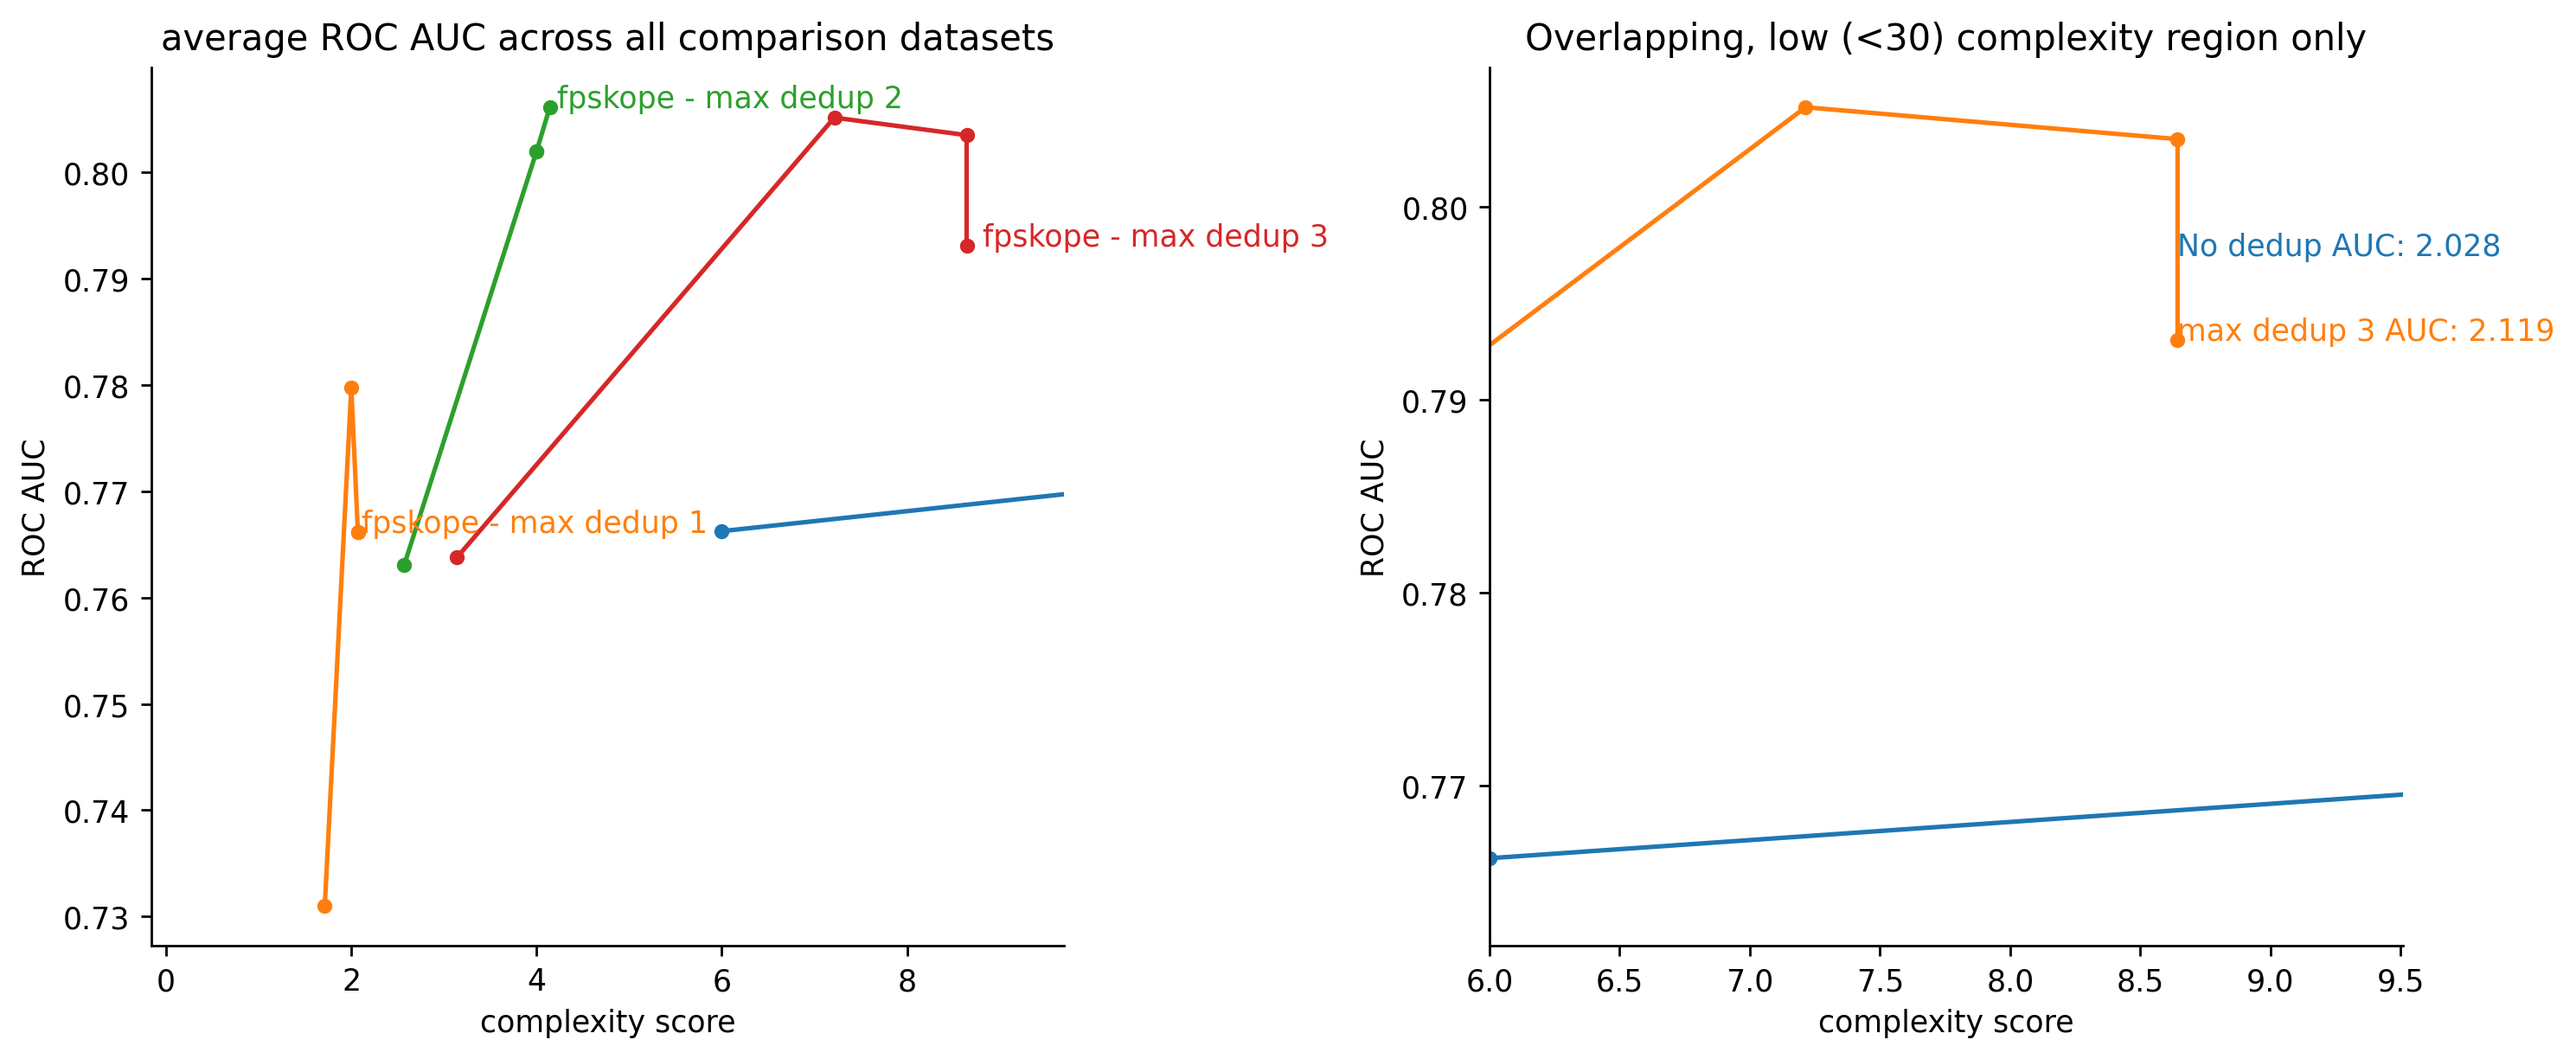

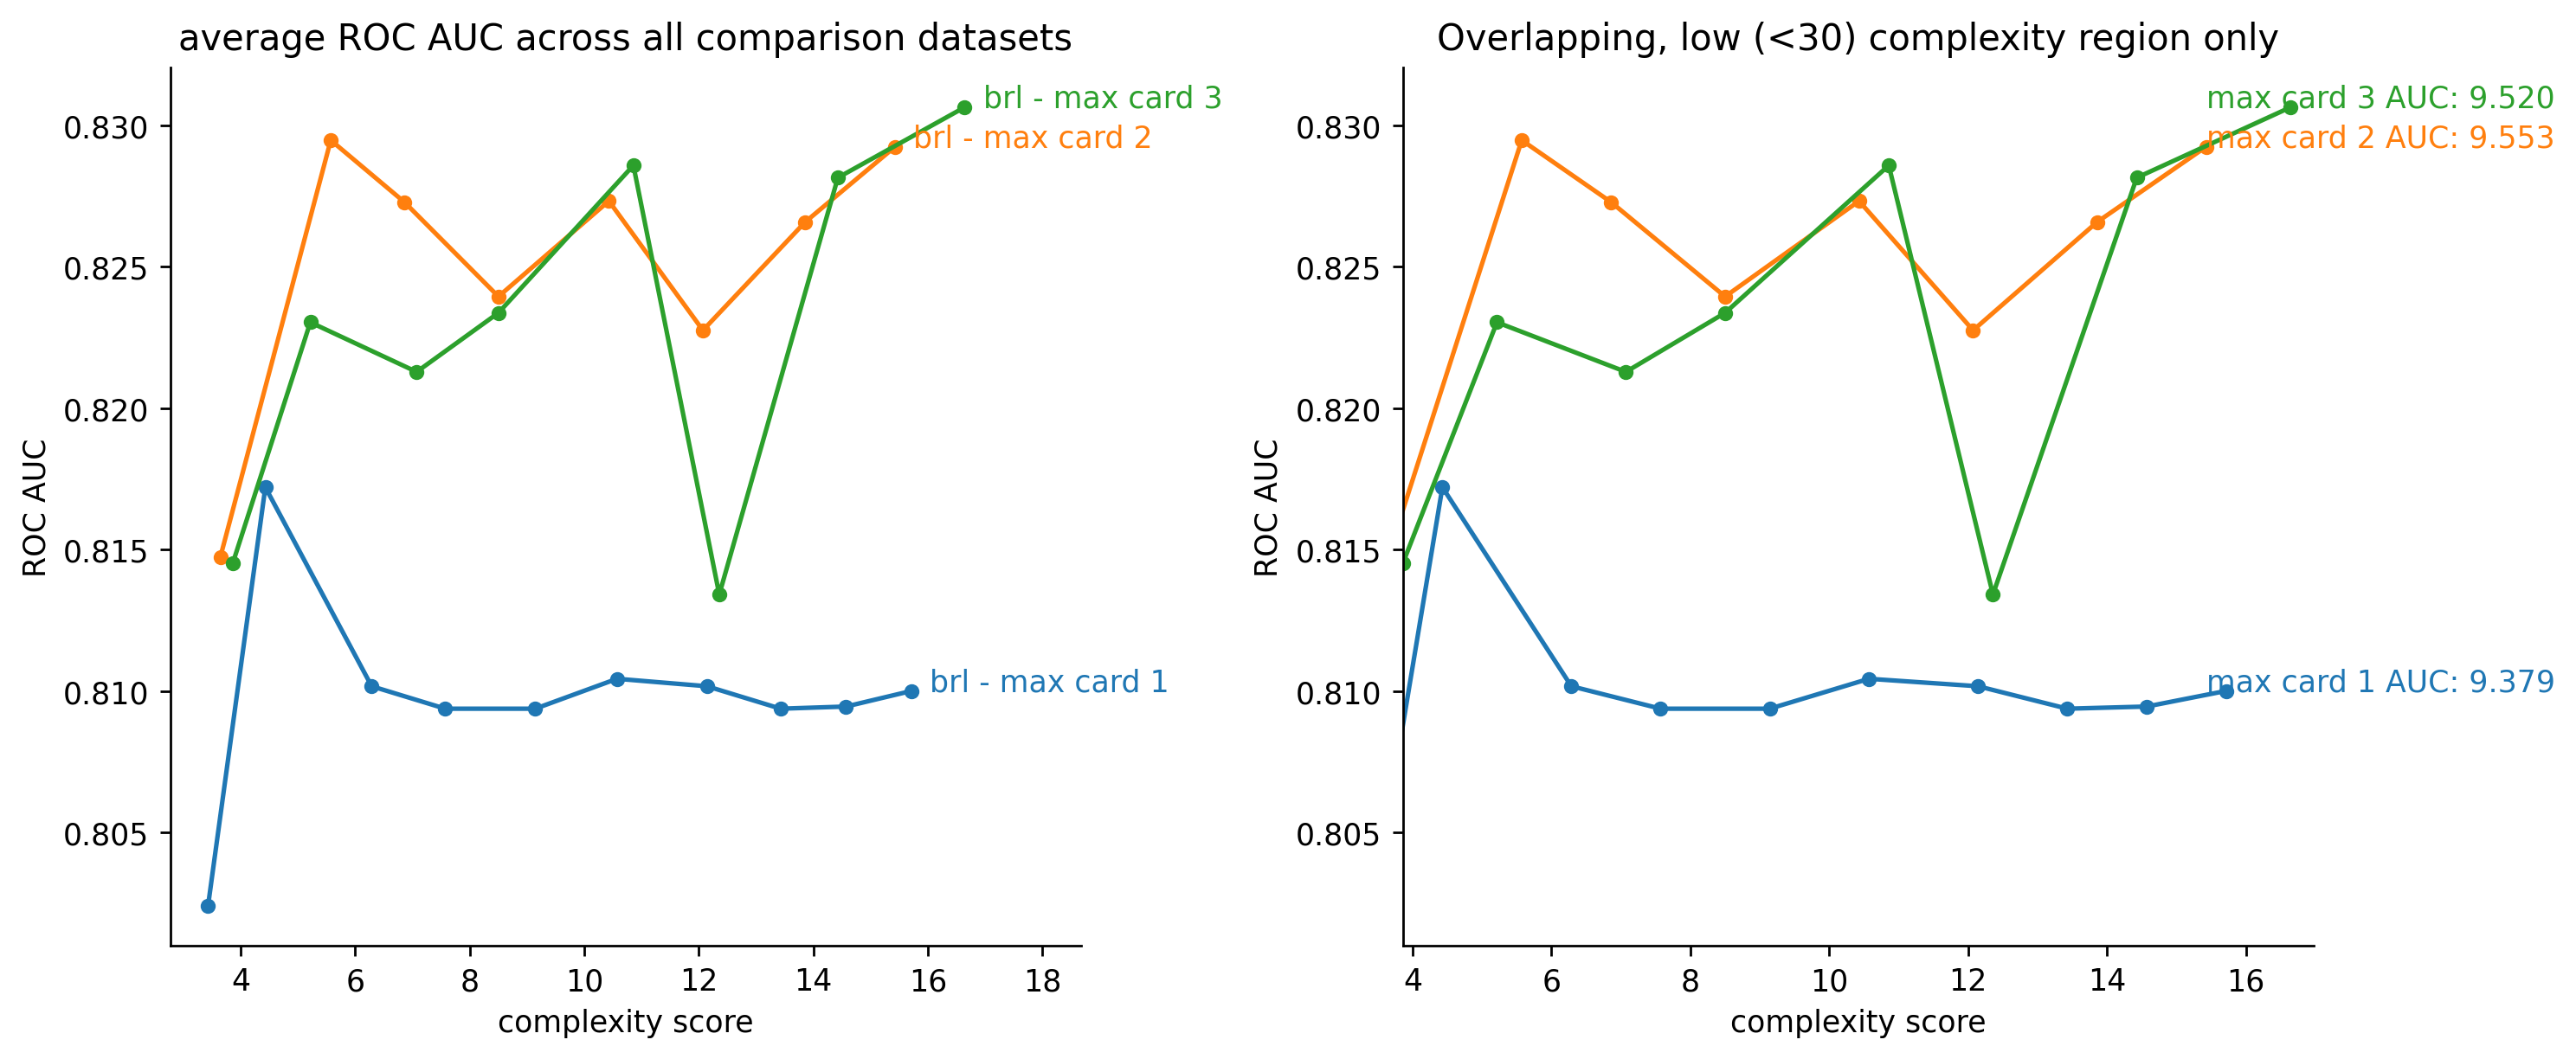

In [5]:
for model_name in ['random_forest', 'gradient_boosting', 'skope_rules', 
              'rulefit', 'fplasso', 'fpskope', 'brl']:
    comparison_result = get_comparison_result(MODEL_COMPARISON_PATH, model_name)
    viz.viz_comparison_val_average(comparison_result)
    plt.show()

In [6]:
df = get_comparison_result(MODEL_COMPARISON_PATH, 'brl', True)['df']
df.loc[:, ['time' in c for c in df.columns]]

,breast-cancer_time,breast-w_time,credit-g_time,haberman_time,heart_time,labor_time,vote_time,mean_time
brl,22.746632,42.453016,39.062060,13.035688,28.574453,20.163758,24.874392,27.272857
brl,58.533050,110.240252,97.849742,27.658032,77.814842,57.915127,73.166276,71.882474
brl,84.339606,140.719817,125.059912,37.705638,101.722881,49.823890,59.010877,85.483232
brl,102.083032,160.275953,148.705061,49.067550,120.863925,97.272786,121.974598,114.320415
brl,118.228040,176.913718,167.022928,56.756036,137.428704,111.094313,93.551506,122.999321
brl,129.651349,193.094836,182.434349,64.334413,152.450968,124.879459,152.526132,142.767358
brl,140.797823,212.566098,199.208708,70.303881,165.975037,136.515674,127.087892,150.350730
brl,83.474811,130.494015,125.785727,41.444390,102.788918,86.026276,106.868959,96.697585
